# Original Inference

In [9]:
from beads import beads
import numpy as np
import matplotlib.pyplot as plt
from refractiveindex import RefractiveIndexMaterial
import grcwa

nm_to_um = 1e-3

SiO2 = RefractiveIndexMaterial(shelf='main', book='SiO2', page='Franta-25C')
HfO2 = RefractiveIndexMaterial(shelf='main', book='HfO2', page='Franta')
Ag = RefractiveIndexMaterial(shelf='main', book='Ag', page='Ciesielski')
Si = RefractiveIndexMaterial(shelf='main', book='Si', page='Franta-25C')
Ti = RefractiveIndexMaterial(shelf='main', book='Ti', page='Werner')
Ti_2 = RefractiveIndexMaterial(shelf='main', book='Ti', page='Ordal')
SodaLime = RefractiveIndexMaterial(shelf='glass', book='soda-lime', page='Rubin-IR')

""" dev_structure = [
    ('air',0.0,'slab'),
    (SiO2,0.5,'slab'),
    (Ag,0.2,'slab'),
    (Ti_2,0.02,'slab'),
    (Si,0.75,'slab'), 
    ('air',0.0,'slab')
] """

dev_structure = [
    ('air',0.0,'slab'), 
    (SiO2,8,'honeycomb'), 
    (Ag,0.2,'slab'),
    (Ti_2,0.02,'slab'),
    (Si,0.75,'slab'),
    ('air',0.0,'slab') 
]

diameter = 8 # um
wv_sweep = np.linspace(5, 20, num=100, endpoint=True) + 0.000001

grcwa.set_backend('numpy')

In [ ]:
Rs, Ts, As = beads(wv_sweep, nG=40, theta_start=0, theta_end=80, n_theta=10, 
                   theta_sweep=False, Nx=50, Ny=50, Np=25, structure=dev_structure,
                   diameter=diameter)

theta 0


(0.0, 1.0)

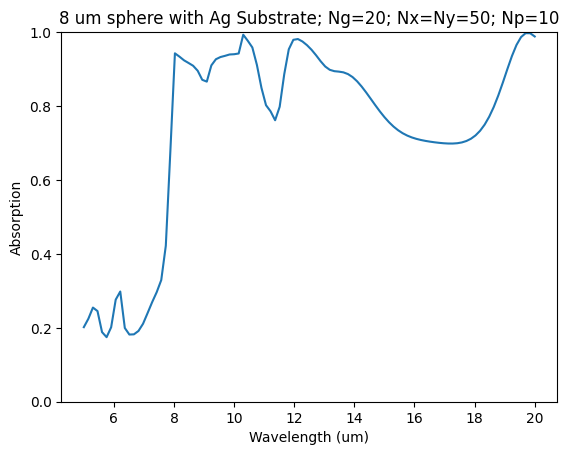

In [ ]:
plt.plot(wv_sweep, As)
plt.xlabel("Wavelength (um)")
plt.ylabel("Absorption")
plt.title("8 um sphere with Ag Substrate; Ng=20; Nx=Ny=50; Np=10")
plt.ylim(0, 1)

(0.0, 1.0)

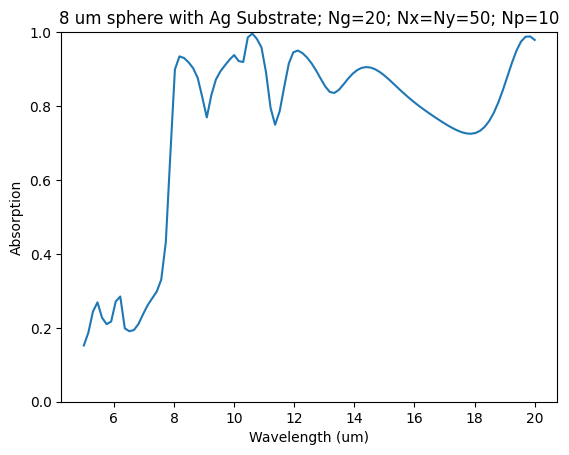

In [5]:
plt.plot(wv_sweep, As)
plt.xlabel("Wavelength (um)")
plt.ylabel("Absorption")
plt.title("8 um sphere with Ag Substrate; Ng=20; Nx=Ny=50; Np=10")
plt.ylim(0, 1)

# Torch Inference

In [1]:
from beads_torch import beads_torch
import torch
import matplotlib.pyplot as plt
from refractiveindex import RefractiveIndexMaterial

nm_to_um = 1e-3

SiO2 = RefractiveIndexMaterial(shelf='main', book='SiO2', page='Franta-25C')
HfO2 = RefractiveIndexMaterial(shelf='main', book='HfO2', page='Franta')
Ag = RefractiveIndexMaterial(shelf='main', book='Ag', page='Ciesielski')
Si = RefractiveIndexMaterial(shelf='main', book='Si', page='Franta-25C')
Ti = RefractiveIndexMaterial(shelf='main', book='Ti', page='Werner')
Ti_2 = RefractiveIndexMaterial(shelf='main', book='Ti', page='Ordal')
SodaLime = RefractiveIndexMaterial(shelf='glass', book='soda-lime', page='Rubin-IR')

""" dev_structure = [
    ('air',0.0,'slab'),
    (SiO2,0.5,'slab'),
    (Ag,0.2,'slab'),
    (Ti_2,0.02,'slab'),
    (Si,0.75,'slab'), 
    ('air',0.0,'slab')
] """

dev_structure = [
    ('air',0.0,'slab'), 
    (SiO2,8,'honeycomb'), 
    (Ag,0.2,'slab'),
    (Ti_2,0.02,'slab'),
    (Si,0.75,'slab'),
    ('air',0.0,'slab') 
]

device = 'cuda'

diameter = 8 # um
wv_sweep = torch.linspace(5, 20, 100, device=device) + 0.000001

In [ ]:
Rs, Ts, As = beads_torch(wv_sweep, device, nG=20, theta_start=0, theta_end=80, n_theta=20, 
                   theta_sweep=False, Nx=1000, Ny=1000, Np=10, structure=dev_structure,
                   diameter=diameter)

OutOfMemoryError: CUDA out of memory. Tried to allocate 7.45 GiB. GPU 0 has a total capacity of 6.00 GiB of which 0 bytes is free. Of the allocated memory 7.45 GiB is allocated by PyTorch, and 2.98 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

(0.0, 1.0)

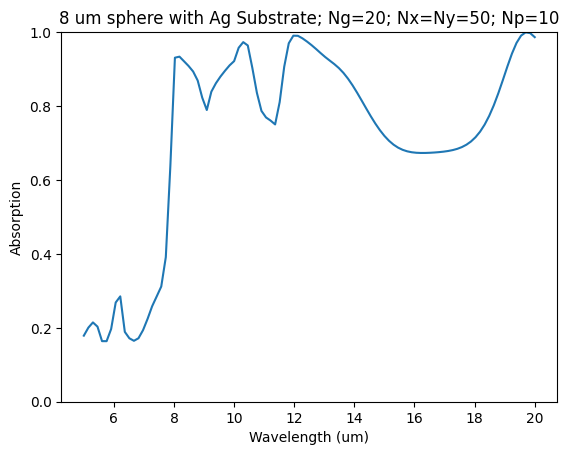

In [9]:
plt.plot(wv_sweep.cpu(), As.cpu())
plt.xlabel("Wavelength (um)")
plt.ylabel("Absorption")
plt.title("8 um sphere with Ag Substrate; Ng=20; Nx=Ny=50; Np=10")
plt.ylim(0, 1)

# Autograd Optimization

In [3]:
from optimize import optimize
import autograd.numpy as np
from refractiveindex import RefractiveIndexMaterial
import grcwa

nm_to_um = 1e-3

SiO2 = RefractiveIndexMaterial(shelf='main', book='SiO2', page='Franta-25C')
HfO2 = RefractiveIndexMaterial(shelf='main', book='HfO2', page='Franta')
Ag = RefractiveIndexMaterial(shelf='main', book='Ag', page='Ciesielski')
Si = RefractiveIndexMaterial(shelf='main', book='Si', page='Franta-25C')
Ti = RefractiveIndexMaterial(shelf='main', book='Ti', page='Werner')
Ti_2 = RefractiveIndexMaterial(shelf='main', book='Ti', page='Ordal')
SodaLime = RefractiveIndexMaterial(shelf='glass', book='soda-lime', page='Rubin-IR')

""" dev_structure = [
    ('air',0.0,'slab'),
    (SiO2,0.5,'slab'),
    (Ag,0.2,'slab'),
    (Ti_2,0.02,'slab'),
    (Si,0.75,'slab'), 
    ('air',0.0,'slab')
] """

# dev_structure = [
#     ('air',0.0*nm_to_um,'slab'),
#     (SiO2,230.0*nm_to_um,'slab'),
#     (HfO2,485.0*nm_to_um,'slab'),
#     (SiO2,688.0*nm_to_um,'slab'),
#     (HfO2,13.0*nm_to_um,'slab'),
#     (SiO2,73.0*nm_to_um,'slab'),
#     (HfO2,34.0*nm_to_um,'slab'),
#     (SiO2,54.0*nm_to_um,'slab'),
#     (Ag,200.0*nm_to_um,'slab'),
#     (Ti_2,20.0*nm_to_um,'slab'),
#     (Si,750.0*nm_to_um,'slab'),
#     ('air',0.0*nm_to_um,'slab')
# ]

dev_structure = [
    ('air',0.0,'slab'), 
    (SiO2,8,'honeycomb'), 
    (Ag,0.2,'slab'),
    (Ti_2,0.02,'slab'),
    (Si,0.75,'slab'),
    ('air',0.0,'slab') 
]

diameter = 8 # um
wv_sweep = np.linspace(5, 20, num=100, endpoint=True) + 0.000001

grcwa.set_backend('autograd')

In [4]:
thicknesses = optimize(wv_sweep, nG=20, theta_start=0, theta_end=80, n_theta=20, 
                   theta_sweep=False, Nx=50, Ny=50, Np=10, structure=dev_structure,
                   diameter=diameter, weight=1e-3, epoch=10, print_every=100, plot=False)

Initial loss: 31.58115639506753
Epoch 0:  31.581156395067424
[0.         8.         0.19999999 0.02       0.75       0.        ]
Trained loss: 31.581156395066483


In [ ]:
plt.plot(wv_sweep, As)
plt.xlabel("Wavelength (um)")
plt.ylabel("Absorption")
plt.title("8 um sphere with Ag Substrate; Ng=20; Nx=Ny=50; Np=10")
plt.ylim(0, 1)

# Pytorch Optimization

In [1]:
from optimize_torch import optimize_torch
from refractiveindex import RefractiveIndexMaterial
import torch

nm_to_um = 1e-3

SiO2 = RefractiveIndexMaterial(shelf='main', book='SiO2', page='Franta-25C')
HfO2 = RefractiveIndexMaterial(shelf='main', book='HfO2', page='Franta')
Ag = RefractiveIndexMaterial(shelf='main', book='Ag', page='Ciesielski')
Si = RefractiveIndexMaterial(shelf='main', book='Si', page='Franta-25C')
Ti = RefractiveIndexMaterial(shelf='main', book='Ti', page='Werner')
Ti_2 = RefractiveIndexMaterial(shelf='main', book='Ti', page='Ordal')
SodaLime = RefractiveIndexMaterial(shelf='glass', book='soda-lime', page='Rubin-IR')

""" dev_structure = [
    ('air',0.0,'slab'),
    (SiO2,0.5,'slab'),
    (Ag,0.2,'slab'),
    (Ti_2,0.02,'slab'),
    (Si,0.75,'slab'), 
    ('air',0.0,'slab')
] """

dev_structure = [
    ('air',0.0*nm_to_um,'slab'),
    (SiO2,8,'honeycomb'),
    (SiO2,230.0*nm_to_um,'slab'),
    (HfO2,485.0*nm_to_um,'slab'),
    (SiO2,688.0*nm_to_um,'slab'),
    (HfO2,13.0*nm_to_um,'slab'),
    (SiO2,73.0*nm_to_um,'slab'),
    (HfO2,34.0*nm_to_um,'slab'),
    (SiO2,54.0*nm_to_um,'slab'),
    (Ag,200.0*nm_to_um,'slab'),
    (Ti_2,20.0*nm_to_um,'slab'),
    (Si,750.0*nm_to_um,'slab'),
    ('air',0.0*nm_to_um,'slab')
]

# dev_structure = [
#     ('air',0.0,'slab'), 
#     (SiO2,8,'honeycomb'), 
#     (Ag,0.2,'slab'),
#     (Ti_2,0.02,'slab'),
#     (Si,0.75,'slab'),
#     ('air',0.0,'slab') 
# ]

diameter = 8. # um
device = 'cuda'
wv_sweep = torch.linspace(5, 20, 100, device=device) + 0.000001

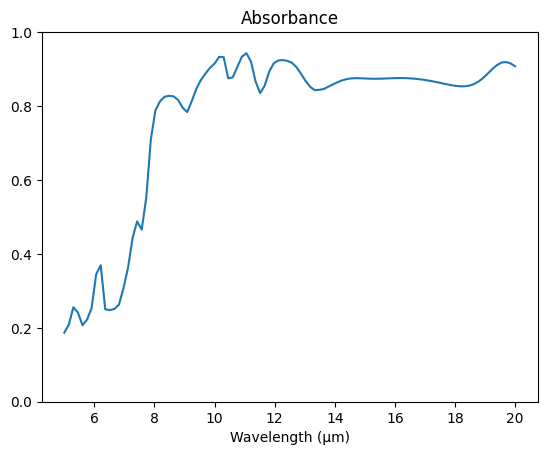

Initial loss: tensor(10.0010, device='cuda:0', dtype=torch.float64, grad_fn=<AddBackward0>)
Epoch 0: Loss = 10.00095656662187
Thicknesses: [2.9322925e-19 8.0000000e+00 2.3254842e-01 4.8602474e-01 6.9013804e-01
 1.4670097e-02 7.5131744e-02 3.5698049e-02 5.6122977e-02 2.0000000e-01
 2.0000000e-02 7.5000000e-01 0.0000000e+00]
Diameter: 8.001569
Epoch 1: Loss = 9.907713946322499
Thicknesses: [0.         8.         0.235062   0.4870285  0.692253   0.01631829
 0.07723945 0.03737554 0.05822133 0.2        0.02       0.75
 0.        ]
Diameter: 8.003122
Epoch 2: Loss = 9.879289019175815
Thicknesses: [2.5039186e-19 8.0000000e+00 2.3755164e-01 4.8801368e-01 6.9435316e-01
 1.7950548e-02 7.9331391e-02 3.9038625e-02 6.0303248e-02 2.0000000e-01
 2.0000000e-02 7.5000000e-01 0.0000000e+00]
Diameter: 8.004657
Epoch 3: Loss = 9.851380146538332
Thicknesses: [6.8854369e-19 8.0000000e+00 2.4001628e-01 4.8898003e-01 6.9643772e-01
 1.9566143e-02 8.1406675e-02 4.0686551e-02 6.2367868e-02 2.0000000e-01
 2.00000

KeyboardInterrupt: 

In [2]:
# thicknesses = optimize_torch(wv_sweep, device, nG=40, theta_start=0, theta_end=80, n_theta=10, 
#                    theta_sweep=True, Nx=50, Ny=50, Np=25, structure=dev_structure,
#                    diameter=diameter, weight=1e-3, epoch=10, print_every=100, plot=True)

thicknesses = optimize_torch(wv_sweep, device, nG=20, theta_start=0, theta_end=80, n_theta=10, 
                   theta_sweep=True, Nx=50, Ny=50, Np=25, structure=dev_structure,
                   diameter=diameter, weight=1e-3, epoch=10, print_every=1, plot=True)

# loss 9.5739

In [12]:
import numpy as np
thicknesses[0] - np.array([t for _, t, _ in dev_structure])

array([8.79781110e-18, 1.49673898e-01, 3.67970839e-01, 8.77713525e-01,
       3.50794595e-01, 9.36038091e-01, 3.61768374e-01, 7.34877487e-01,
       5.09619713e-07, 6.47455454e-08, 0.00000000e+00, 0.00000000e+00])

In [4]:
dev_structure

[('air', 0.0, 'slab'),
 (<refractiveindex.refractiveindex.RefractiveIndexMaterial at 0x281b84292b0>,
  0.23,
  'slab'),
 (<refractiveindex.refractiveindex.RefractiveIndexMaterial at 0x281b8429ee0>,
  0.485,
  'slab'),
 (<refractiveindex.refractiveindex.RefractiveIndexMaterial at 0x281b84292b0>,
  0.6880000000000001,
  'slab'),
 (<refractiveindex.refractiveindex.RefractiveIndexMaterial at 0x281b8429ee0>,
  0.013000000000000001,
  'slab'),
 (<refractiveindex.refractiveindex.RefractiveIndexMaterial at 0x281b84292b0>,
  0.073,
  'slab'),
 (<refractiveindex.refractiveindex.RefractiveIndexMaterial at 0x281b8429ee0>,
  0.034,
  'slab'),
 (<refractiveindex.refractiveindex.RefractiveIndexMaterial at 0x281b84292b0>,
  0.054,
  'slab'),
 (<refractiveindex.refractiveindex.RefractiveIndexMaterial at 0x281c5156630>,
  0.2,
  'slab'),
 (<refractiveindex.refractiveindex.RefractiveIndexMaterial at 0x281c4dc6930>,
  0.02,
  'slab'),
 (<refractiveindex.refractiveindex.RefractiveIndexMaterial at 0x281c517

# Diameter Optimization Torch